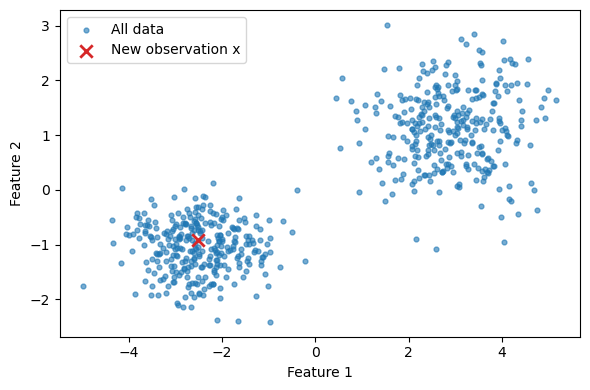

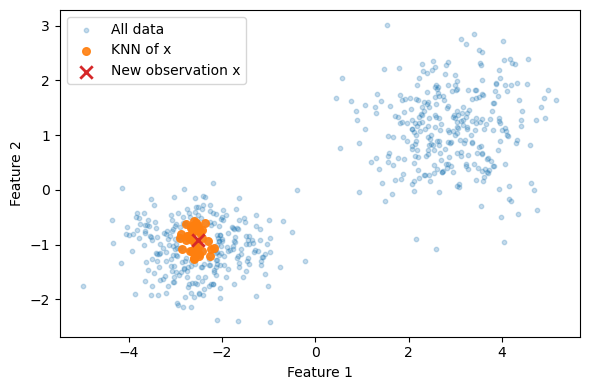

In [7]:
# KNN vs Global (2D only, no PCA). Two separate charts, using matplotlib only and no custom colours.

import numpy as np
import matplotlib.pyplot as plt

# ---------- Utilities ----------
def knn_indices(X, x0, k):
    X = np.asarray(X)
    x0 = np.asarray(x0)
    dists = np.linalg.norm(X - x0, axis=1)
    return np.argsort(dists)[:k]

def ensure_same_limits(ax_src, ax_dst):
    xlim = ax_src.get_xlim()
    ylim = ax_src.get_ylim()
    ax_dst.set_xlim(xlim)
    ax_dst.set_ylim(ylim)

# ---------- Demo 2D data (replace with your own) ----------
np.random.seed(7)
N = 600
# two blobs for a clear visual
X = np.vstack([
    np.random.normal(loc=(-2.5, -1.0), scale=(0.8, 0.5), size=(N//2, 2)),
    np.random.normal(loc=(2.8, 1.2), scale=(1.0, 0.7), size=(N - N//2, 2))
])

# a "new observation" near the first cluster (not necessarily one of X)
x0 = np.array([-2.4, -0.9]) + np.random.normal(0, 0.1, size=2)

k = 40
idx_knn = knn_indices(X, x0, k)

# ---------- Plot 1: Global distribution (2D) ----------
plt.figure(figsize=(6, 4))
ax1 = plt.gca()
ax1.scatter(X[:, 0], X[:, 1], s=12, alpha=0.6, label="All data")
ax1.scatter([x0[0]], [x0[1]], marker="x", s=80, color="tab:red",linewidths=2, label="New observation x")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
# ax1.set_title("Global distribution (2D)")
ax1.legend(loc="best", frameon=True)
plt.tight_layout()
# global_path = "/mnt/data/global_2d.png"
# plt.savefig(global_path, dpi=160)
plt.show()

# ---------- Plot 2: KNN view (show all points, highlight KNN + x0) ----------
plt.figure(figsize=(6, 4))
ax2 = plt.gca()
# all data in background
ax2.scatter(X[:, 0], X[:, 1], s=10, alpha=0.25, label="All data")
# highlight KNN points
# ax2.scatter(X[idx_knn, 0], X[idx_knn, 1], s=30, alpha=0.9, marker="o", label=f"{k}-NN of x0")
ax2.scatter(X[idx_knn, 0], X[idx_knn, 1], s=30, alpha=0.9, marker="o", label=f"KNN of x")
# mark the query point
ax2.scatter([x0[0]], [x0[1]], marker="x", s=80, color="tab:red",linewidths=2, label="New observation x")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
# ax2.set_title(f"KNN view with all points (k={k})")
ax2.legend(loc="best", frameon=True)
ensure_same_limits(ax1, ax2)
plt.tight_layout()
# knn_path = f"/mnt/data/knn_view_2d_k{k}.png"
# plt.savefig(knn_path, dpi=160)
plt.show()



C:\Users\r4718\AppData\Local\Temp\ipykernel_19220\1903344906.py:57: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\r4718\AppData\Local\Temp\ipykernel_19220\1903344906.py:57: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\r4718\AppData\Local\Temp\ipykernel_19220\1903344906.py:57: UserWarning: Glyph 26680 (\N{CJK UNIFIED IDEOGRAPH-6838}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\r4718\AppData\Local\Temp\ipykernel_19220\1903344906.py:57: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\r4718\AppData\Local\Temp\ipykernel_19220\1903344906.py:57: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\r4718\AppData\Local\Temp\ipykernel_19220\1903344906.py:57: UserWarning: Glyph 28508 (\

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\mnt\\data\\icm_diagram.png'

d:\anaconda3\envs\FGPyT\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\anaconda3\envs\FGPyT\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\anaconda3\envs\FGPyT\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26680 (\N{CJK UNIFIED IDEOGRAPH-6838}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\anaconda3\envs\FGPyT\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\anaconda3\envs\FGPyT\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\anaconda3\envs\FGPyT\lib\site-packages\IPython\core\events.py:82: UserWa

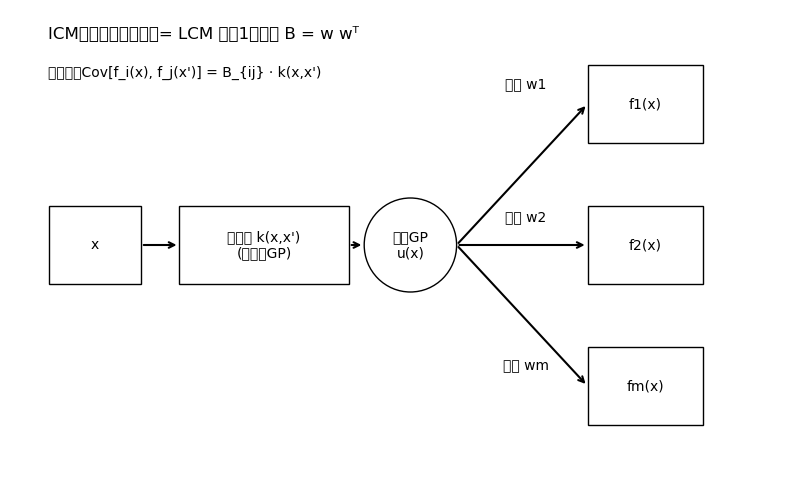

In [ ]:
# Visualize how ICM, LCM, and Neural Networks extend single-output models to multi-output.

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch
import os

def add_box(ax, xy, width, height, label):
    rect = Rectangle(xy, width, height, fill=False)
    ax.add_patch(rect)
    ax.text(xy[0] + width/2, xy[1] + height/2, label, ha='center', va='center')
    return rect

def add_circle(ax, center, radius, label):
    circ = Circle(center, radius, fill=False)
    ax.add_patch(circ)
    ax.text(center[0], center[1], label, ha='center', va='center')
    return circ

def add_arrow(ax, start, end, text=None):
    arrow = FancyArrowPatch(posA=start, posB=end, arrowstyle='->', mutation_scale=10, lw=1.5)
    ax.add_patch(arrow)
    if text is not None:
        mid = ((start[0]+end[0])/2, (start[1]+end[1])/2)
        ax.text(mid[0], mid[1]+0.1, text, ha='center', va='bottom')

# 1) ICM diagram: single latent GP with task mixing to multiple outputs
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
ax1.axis('off')

# Input and latent GP
add_box(ax1, (0.5, 2.5), 1.2, 1.0, "x")
add_box(ax1, (2.2, 2.5), 2.2, 1.0, "单一核 k(x,x')\n(单输出GP)")
add_circle(ax1, (5.2, 3.0), 0.6, "潜在GP\nu(x)")

# Outputs
outputs_icm = [("f1(x)", 7.5, 4.8), ("f2(x)", 7.5, 3.0), ("fm(x)", 7.5, 1.2)]
for label, x0, y0 in outputs_icm:
    add_box(ax1, (x0, y0-0.5), 1.5, 1.0, label)

# Arrows
add_arrow(ax1, (1.7, 3.0), (2.2, 3.0))
add_arrow(ax1, (4.4, 3.0), (4.6, 3.0))
add_arrow(ax1, (5.8, 3.0), (7.5, 4.8))
add_arrow(ax1, (5.8, 3.0), (7.5, 3.0))
add_arrow(ax1, (5.8, 3.0), (7.5, 1.2))
ax1.text(6.7, 5.0, "权重 w1", ha='center')
ax1.text(6.7, 3.3, "权重 w2", ha='center')
ax1.text(6.7, 1.4, "权重 wm", ha='center')

# Title and formula
ax1.text(0.5, 5.7, "ICM（内在共区域化）= LCM 的秩1特例： B = w wᵀ", ha='left', va='center', fontsize=12)
ax1.text(0.5, 5.2, "协方差：Cov[f_i(x), f_j(x')] = B_{ij} · k(x,x')", ha='left', va='center')

icm_path = "/mnt/data/icm_diagram.png"
plt.tight_layout()
plt.savefig(icm_path, dpi=200, bbox_inches='tight')
plt.show()

# 2) LCM diagram: multiple latent GPs with linear mixing
fig2, ax2 = plt.subplots(figsize=(9, 6))
ax2.set_xlim(0, 12)
ax2.set_ylim(0, 8)
ax2.axis('off')

# Input and kernels
add_box(ax2, (0.6, 3.6), 1.2, 1.0, "x")
add_box(ax2, (2.1, 6.2), 2.2, 1.0, "核 k₁(x,x')")
add_box(ax2, (2.1, 3.6), 2.2, 1.0, "核 k₂(x,x')")
add_box(ax2, (2.1, 1.0), 2.2, 1.0, "核 k_Q(x,x')")

add_arrow(ax2, (1.8, 4.1), (2.1, 6.7))
add_arrow(ax2, (1.8, 4.1), (2.1, 4.1))
add_arrow(ax2, (1.8, 4.1), (2.1, 1.5))

# Latent GPs
add_circle(ax2, (5.0, 6.7), 0.6, "u₁(x)")
add_circle(ax2, (5.0, 4.1), 0.6, "u₂(x)")
add_circle(ax2, (5.0, 1.5), 0.6, "u_Q(x)")
add_arrow(ax2, (4.3, 6.7), (4.4, 6.7))
add_arrow(ax2, (4.3, 4.1), (4.4, 4.1))
add_arrow(ax2, (4.3, 1.5), (4.4, 1.5))

# Outputs
outputs_lcm = [("f1(x)", 10.0, 6.5), ("f2(x)", 10.0, 4.1), ("fm(x)", 10.0, 1.7)]
for label, x0, y0 in outputs_lcm:
    add_box(ax2, (x0, y0-0.5), 1.5, 1.0, label)

# Arrows from each latent to each output (show a subset + labels to indicate mixing)
add_arrow(ax2, (5.6, 6.7), (10.0, 6.5), text="a₁1")
add_arrow(ax2, (5.6, 6.7), (10.0, 4.1), text="a₂1")
add_arrow(ax2, (5.6, 6.7), (10.0, 1.7), text="a_m1")

add_arrow(ax2, (5.6, 4.1), (10.0, 6.5), text="a₁2")
add_arrow(ax2, (5.6, 4.1), (10.0, 4.1), text="a₂2")
add_arrow(ax2, (5.6, 4.1), (10.0, 1.7), text="a_m2")

add_arrow(ax2, (5.6, 1.5), (10.0, 6.5), text="a₁Q")
add_arrow(ax2, (5.6, 1.5), (10.0, 4.1), text="a₂Q")
add_arrow(ax2, (5.6, 1.5), (10.0, 1.7), text="a_mQ")

ax2.text(0.6, 7.6, "LCM（线性共区域化）： f_i(x) = ∑_{q=1}^Q a_{iq} u_q(x)", ha='left', va='center', fontsize=12)
ax2.text(0.6, 7.1, "协方差：Cov = ∑_{q=1}^Q B^{(q)} ⊗ k_q(x,x')， 其中 B^{(q)} = a_{·q} a_{·q}ᵀ", ha='left', va='center')

lcm_path = "/mnt/data/lcm_diagram.png"
plt.tight_layout()
plt.savefig(lcm_path, dpi=200, bbox_inches='tight')
plt.show()

# 3) Neural network multi-output diagram: shared trunk + final linear layer to m outputs
fig3, ax3 = plt.subplots(figsize=(9, 6))
ax3.set_xlim(0, 12)
ax3.set_ylim(0, 8)
ax3.axis('off')

# Input
add_box(ax3, (0.8, 3.6), 1.2, 1.0, "x")

# Shared trunk
add_box(ax3, (2.6, 3.0), 2.2, 2.2, "共享特征提取\nh_θ(x)")

# Output layer
add_box(ax3, (5.5, 5.2), 2.2, 1.0, "线性层 W")
add_box(ax3, (5.5, 3.6), 2.2, 1.0, "或多头 Head_i")
add_arrow(ax3, (2.0, 4.1), (2.6, 4.1))
add_arrow(ax3, (4.8, 4.1), (5.5, 5.7))
add_arrow(ax3, (4.8, 4.1), (5.5, 4.1))

# Outputs
add_box(ax3, (8.4, 6.2), 1.5, 1.0, "f1(x)")
add_box(ax3, (8.4, 4.6), 1.5, 1.0, "f2(x)")
add_box(ax3, (8.4, 1.8), 1.5, 1.0, "fm(x)")

add_arrow(ax3, (7.7, 5.7), (8.4, 6.7))
add_arrow(ax3, (7.7, 5.7), (8.4, 5.1))
add_arrow(ax3, (7.7, 4.1), (8.4, 2.3))

# Titles and formulas
ax3.text(0.8, 7.6, "神经网络多输出： y(x) = W h_θ(x)  或  y_i(x) = Head_i(h_θ(x))", ha='left', va='center', fontsize=12)
ax3.text(0.8, 7.1, "协方差（隐式）：通过共享参数与表示学习建模任务相关性", ha='left', va='center')

# nn_path = "/mnt/data/nn_multioutput.png"
plt.tight_layout()
# plt.savefig(nn_path, dpi=200, bbox_inches='tight')
plt.show()

icm_path, lcm_path, nn_path
